# Serial Correlation
First, read this [Wikipedia article](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic) about the Durbin-Watson statistic (just read the intro and the first section after the intro).
## Now, let's take a look at this statistic in various contexts.
### First, code up your own Durbin-Watson statistic.

In [3]:
def myDurbinWatson(residuals):
    d = 0.0
    for i in range(len(residuals)-1):
        d += (residuals[i] - residuals[i+1])**2
    divisor = sum([x**2 for x in residuals])
    d /= divisor
    return d

### Now, create data that represents a linear model with noise, then fit a line to it, and see what your Durbin-Watson statistic gives for this model.
Also, plot the data and the line.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [57]:
xRow = np.linspace(0,10)
y = 2.0*xRow + np.random.normal(loc=0.0, scale=0.1, size=len(xRow))

In [58]:
x = xRow.reshape(-1,1)

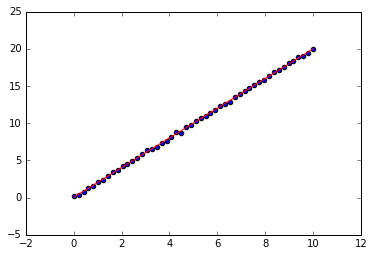

In [62]:
lr = LinearRegression()
lr.fit(x,y)
yHat = lr.predict(x)
plt.scatter(x,y)
plt.plot(x,yHat,color='r')
plt.show()

In [63]:
residuals = y - yHat
dw = myDurbinWatson(residuals)
dw

2.1646370503919603

### Now, create data that represents a quadratic model with noise, but still fit a *line* to it, and see what your Durbin-Watson statistic gives for this model.
Also, plot the data and the line.

In [69]:
y = xRow*xRow + np.random.normal(loc=0.0, scale=0.1, size=len(x))

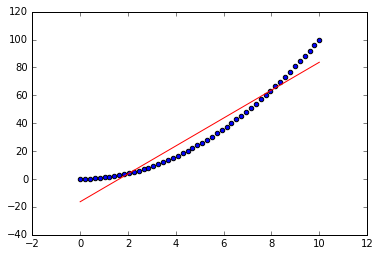

In [74]:
lr.fit(x,y)
yHat = lr.predict(x)
plt.scatter(x,y)
plt.plot(x,yHat,color='r')
plt.show()

In [75]:
residuals = y - yHat
dw = myDurbinWatson(residuals)
dw

0.022602569633518338

### Reflect
What does your Durbin-Watson statistic tell you about the serial correlation of the residuals in the above models?  Is this to your expectation?

When you have a pattern amongst the residuals, what does that tell you about your model?